Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

Data Collection and Processing

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

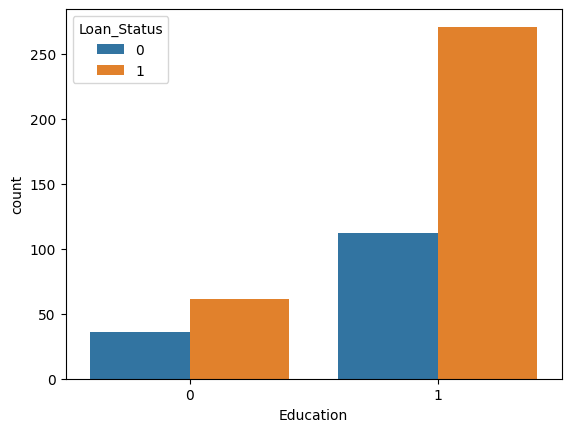

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

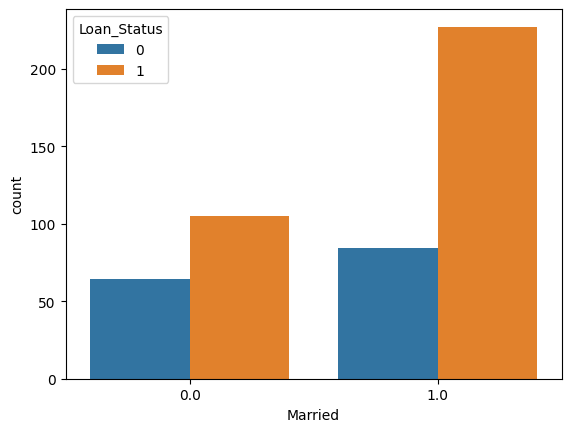

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
5       1.0      1.0          2          1            1.0             5417   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [ ]:
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Machine model
model.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



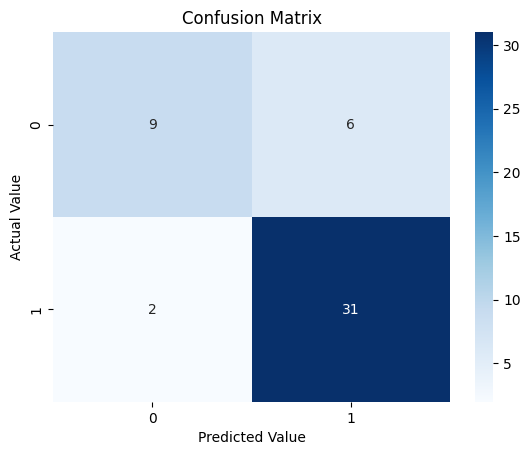

In [ ]:
Y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, Y_pred))
sns.heatmap(pd.crosstab(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

Making a predictive system

In [ ]:
def predict_loan_approval(input_data):
    # Convert input data to a numpy array
    input_data_array = np.asarray(input_data)
    # Reshape data for a single prediction
    input_data_reshaped = input_data_array.reshape(1, -1)
    # Predict using the trained model
    prediction = model.predict(input_data_reshaped)
    if prediction[0] == 1:
        return 'Loan Approved ✅'
    else:
        return 'Loan Not Approved ❌'

# Step 9: Test the Predictive System (eg: Gender=1, Married=1, Dependents=0, Education=1, Self_Employed=0, ApplicantIncome=5000,CoapplicantIncome=0.0, LoanAmount=150.0, Loan_Amount_Term=360.0, Credit_History=1.0, Property_Area=2)
test_input = [1, 1, 0, 1, 0, 5000, 0.0, 150.0, 360.0, 1.0, 2]

result = predict_loan_approval(test_input)
print("Prediction Result:", result)

Prediction Result: Loan Approved ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
